<a href="https://colab.research.google.com/github/Dash400air/CommonLit/blob/main/CommonLit_textstats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/python/data/Common Lit kaggle/train.csv')
test = pd.read_csv('/content/drive/MyDrive/python/data/Common Lit kaggle/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/python/data/Common Lit kaggle/sample_submission.csv')

# 概要

In [ ]:
train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [ ]:
train.shape

(2834, 6)

In [ ]:
train.describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


In [ ]:
train.isnull().sum()

id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64

In [ ]:
train.excerpt.min()

'"\'Morning, Jeeves," I said.\n"Good morning, sir," said Jeeves. He put the good old cup of tea softly on the table by my bed, and I took a refreshing sip. Just right, as usual. Not too hot, not too sweet, not too weak, not too strong, not too much milk, and not a drop spilled in the saucer. A most amazing cove, Jeeves. So dashed competent in every respect. I\'ve said it before, and I\'ll say it again. I mean to say, take just one small instance. Every other valet I\'ve ever had used to barge into my room in the morning while I was still asleep, causing much misery: but Jeeves seems to know when I\'m awake by a sort of telepathy. He always floats in with the cup exactly two minutes after I come to life. Makes a deuce of a lot of difference to a fellow\'s day.\n"How\'s the weather, Jeeves?" \n"Exceptionally clement, sir."\n"Anything in the papers?"\n"Some slight friction threatening in the Balkans, sir. Otherwise, nothing."'

In [ ]:
#max(target)
train.excerpt[1705]

'The commutator is peculiar, consisting of only three segments of a copper ring, while in the simplest of other continuous current generators several times that number exist, and frequently 120! segments are to be found. These three segments are made so as to be removable in a moment for cleaning or replacement. They are mounted upon a metal support, and are surrounded on all sides by a free air space, and cannot, therefore, lose their insulated condition. This feature of air insulation is peculiar to this system, and is very important as a factor in the durability of the commutator. Besides this, the commutator is sustained by supports carried in flanges upon the shaft, which flanges, as an additional safeguard, are coated all over with hard rubber, one of the finest known insulators. It may be stated, without fear of contradiction, that no other commutator made is so thoroughly insulated and protected. The three commutator segments virtually constitute a single copper ring, mounted i

In [ ]:
#min(target)
train.excerpt[2829]

'When you think of dinosaurs and where they lived, what do you picture? Do you see hot, steamy swamps, thick jungles, or sunny plains? Dinosaurs lived in those places, yes. But did you know that some dinosaurs lived in the cold and the darkness near the North and South Poles?\nThis surprised scientists, too. Paleontologists used to believe that dinosaurs lived only in the warmest parts of the world. They thought that dinosaurs could only have lived in places where turtles, crocodiles, and snakes live today. Later, these dinosaur scientists began finding bones in surprising places.\nOne of those surprising fossil beds is a place called Dinosaur Cove, Australia. One hundred million years ago, Australia was connected to Antarctica. Both continents were located near the South Pole. Today, paleontologists dig dinosaur fossils out of the ground. They think about what those ancient bones must mean.'

In [ ]:
train.target.min()

-3.676267773

In [ ]:
print(train.loc[train['target'] == 1.7113898269999999])

             id  ... standard_error
2829  25ca8f498  ...         0.6469

[1 rows x 6 columns]


# Textstat

In [ ]:
!pip install textstat

     |████████████████████████████████| 102kB 9.8MB/s 
     |████████████████████████████████| 2.0MB 27.7MB/s 


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## DataFrame化

In [ ]:
excerpt = train.excerpt
excerpt_list = excerpt.values.tolist()

In [ ]:
import textstat

readability_list = []

for text in excerpt_list: 
    fre = textstat.flesch_reading_ease(text)
    smog = textstat.smog_index(text)
    fkg = textstat.flesch_kincaid_grade(text)
    cli = textstat.coleman_liau_index(text)
    arbi = textstat.automated_readability_index(text)
    dcrs = textstat.dale_chall_readability_score(text)
    dw = textstat.difficult_words(text)
    lwf = textstat.linsear_write_formula(text)
    gf = textstat.gunning_fog(text)

    readability_list.append([fre, smog, fkg, cli, arbi, dcrs, dw, lwf, gf])

In [ ]:
readability = pd.DataFrame(readability_list)

In [ ]:
readability.head()

,0,1,2,3,4,5,6,7,8
0,80.31,8.6,6.1,8.06,8.3,6.65,25,9.000000,8.31
1,82.54,8.3,5.2,6.78,7.2,5.92,17,7.285714,7.53
2,75.74,10.1,7.9,7.20,10.1,6.29,17,14.750000,10.49
3,72.02,6.7,11.4,8.54,16.4,6.61,14,12.500000,13.61
4,75.47,8.8,10.0,4.83,11.8,1.57,1,13.500000,11.76


In [ ]:
target = train.target
df = pd.concat([target, readability], axis=1)

In [ ]:
df.head()

,target,0,1,2,3,4,5,6,7,8
0,-0.340259,80.31,8.6,6.1,8.06,8.3,6.65,25,9.000000,8.31
1,-0.315372,82.54,8.3,5.2,6.78,7.2,5.92,17,7.285714,7.53
2,-0.580118,75.74,10.1,7.9,7.20,10.1,6.29,17,14.750000,10.49
3,-1.054013,72.02,6.7,11.4,8.54,16.4,6.61,14,12.500000,13.61
4,0.247197,75.47,8.8,10.0,4.83,11.8,1.57,1,13.500000,11.76


In [ ]:
readability_compare = df.rename(columns={0: 'fre',
                                         1: 'smog',
                                         2: 'fkg',
                                         3: 'cli',
                                         4: 'arbi',
                                         5: 'dcrs',
                                         6: 'dw',
                                         7: 'lwf',
                                         8: 'gf'
                                         }
                                )

In [ ]:
readability_compare.head()

,target,fre,smog,fkg,cli,arbi,dcrs,dw,lwf,gf
0,-0.340259,80.31,8.6,6.1,8.06,8.3,6.65,25,9.000000,8.31
1,-0.315372,82.54,8.3,5.2,6.78,7.2,5.92,17,7.285714,7.53
2,-0.580118,75.74,10.1,7.9,7.20,10.1,6.29,17,14.750000,10.49
3,-1.054013,72.02,6.7,11.4,8.54,16.4,6.61,14,12.500000,13.61
4,0.247197,75.47,8.8,10.0,4.83,11.8,1.57,1,13.500000,11.76


## 相関分析

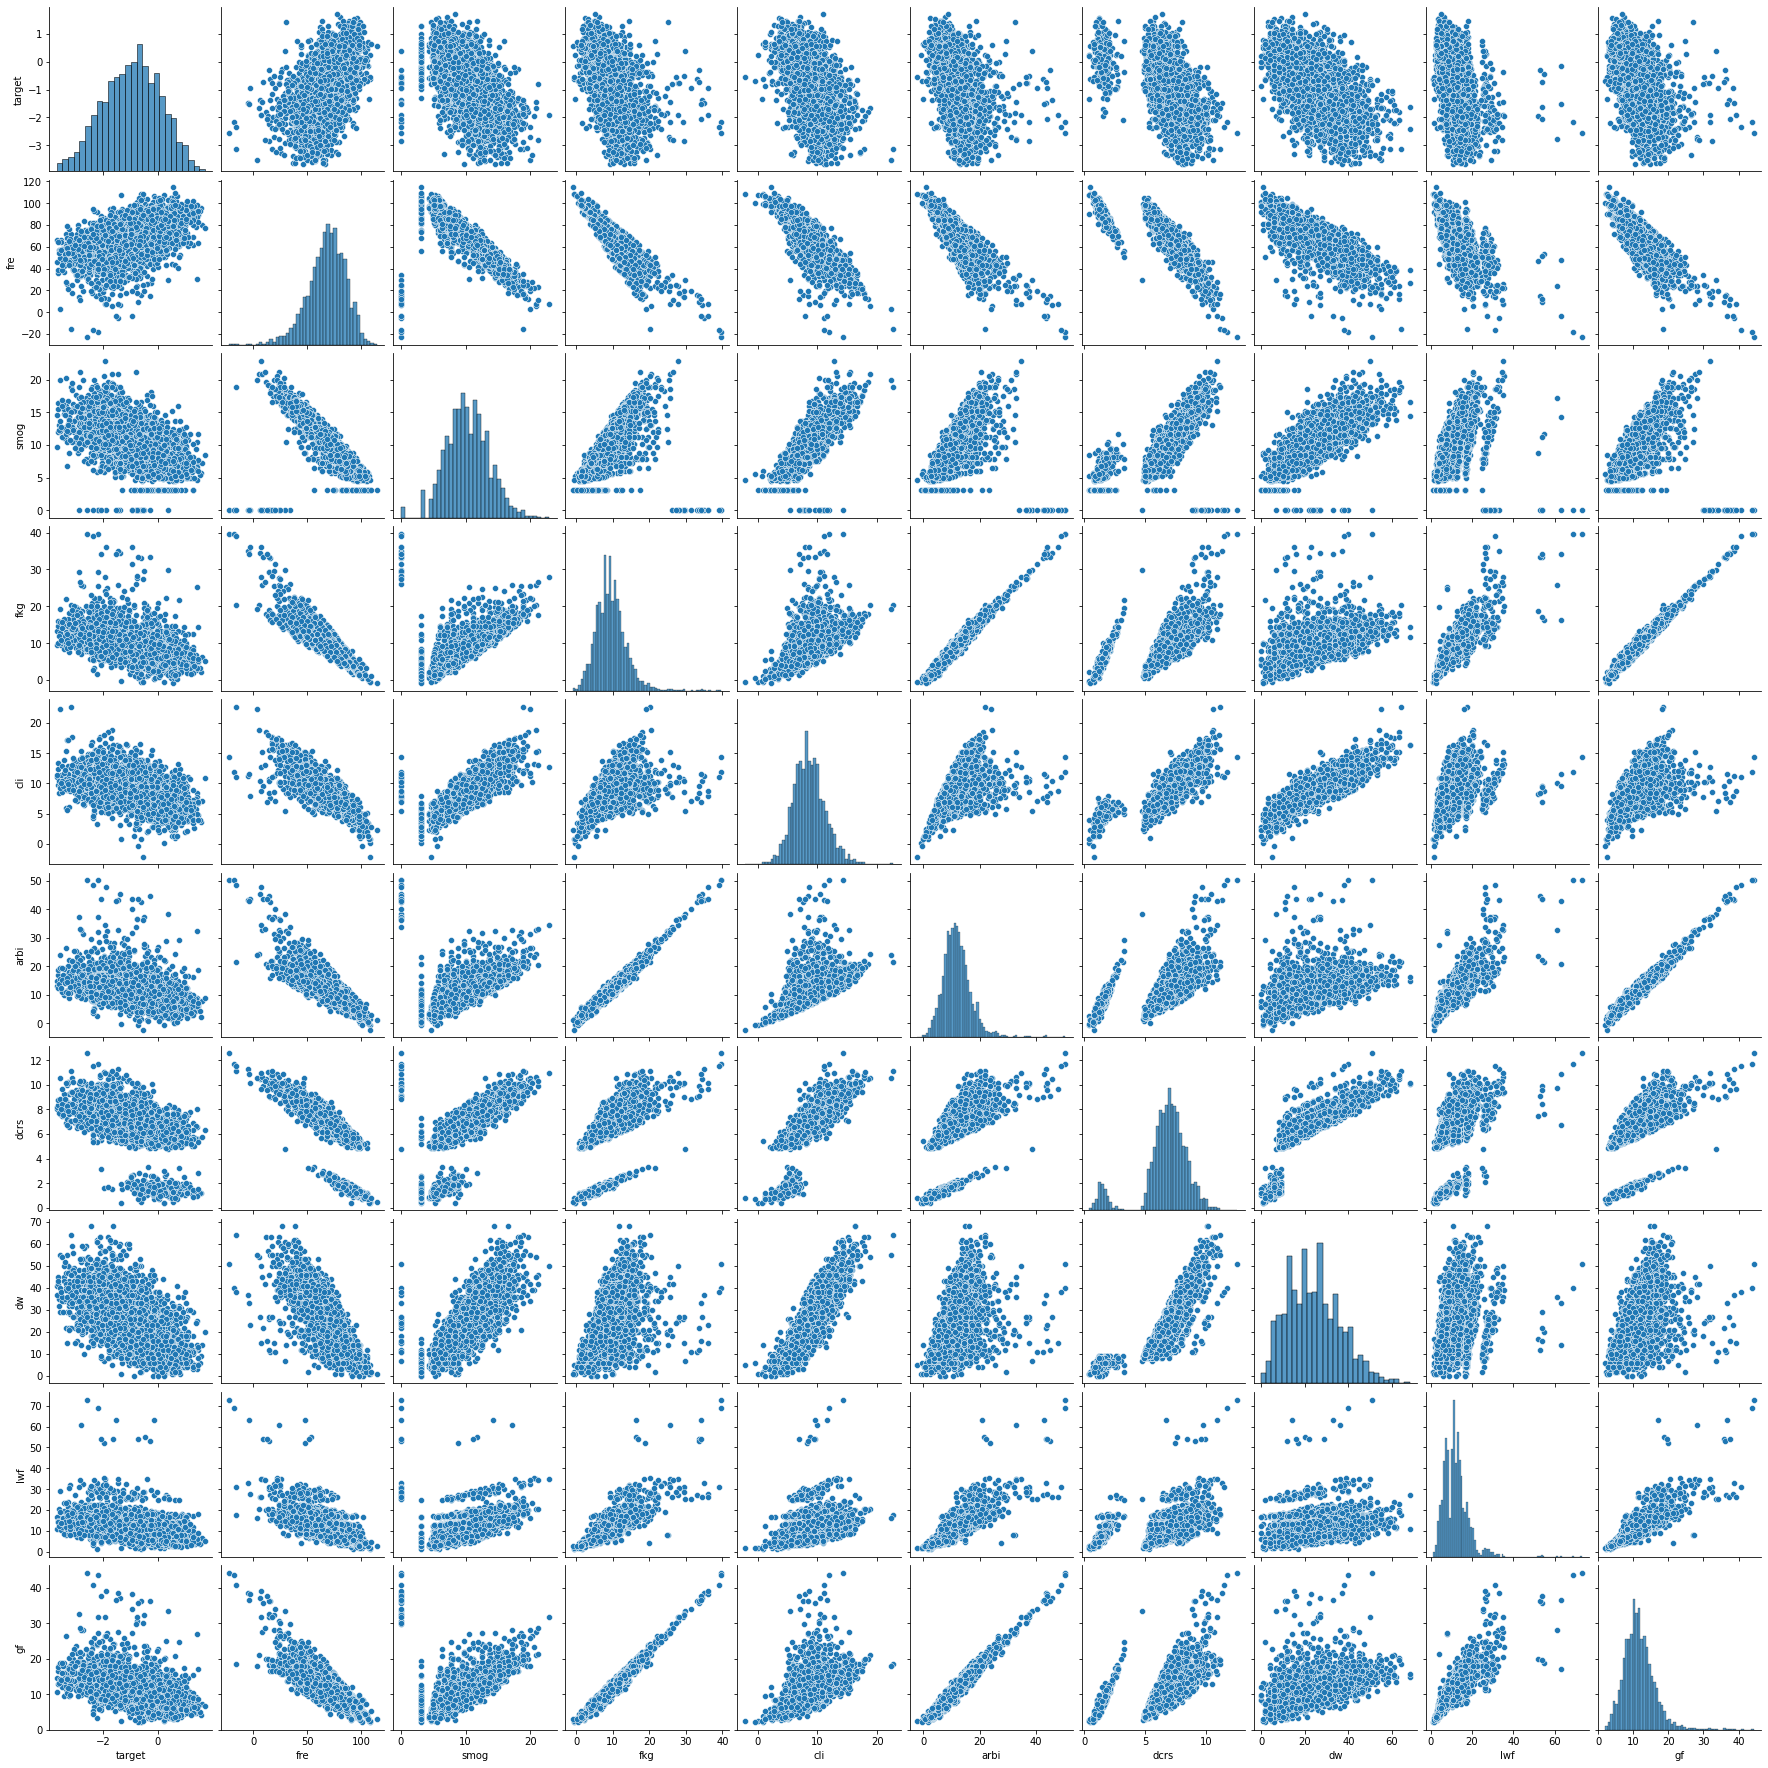

In [ ]:
sns.pairplot(readability_compare)

In [ ]:
coef = readability_compare.corr()

print(coef.target)

target    1.000000
fre       0.518415
smog     -0.529825
fkg      -0.436304
cli      -0.482810
arbi     -0.401360
dcrs     -0.551194
dw       -0.579745
lwf      -0.364676
gf       -0.439879
Name: target, dtype: float64
